<a href="https://colab.research.google.com/github/Aditya-Raj-Kaushik/Stochastic-Gradient-Descent/blob/main/Stochastic%20Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
data = load_diabetes()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
def stochastic_gradient_descent(X, y, lr=0.01, epochs=1000, tolerance=1e-4):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    cost_history = []
    for epoch in range(epochs):
        cost = 0
        for i in range(m):
            rand_idx = np.random.randint(m)
            X_i = X[rand_idx, :].reshape(1, -1)
            y_i = y[rand_idx].reshape(1, )
            y_pred = np.dot(X_i, weights) + bias
            dw = -(2) * np.dot(X_i.T, (y_i - y_pred))
            db = -(2) * (y_i - y_pred)
            weights -= lr * dw.flatten()
            bias -= lr * db
            cost += (y_pred - y_i) ** 2
        cost_history.append(cost/m)
        if epoch > 1 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
            break
    return weights, bias, cost_history

In [4]:
weights, bias, cost_history = stochastic_gradient_descent(X_train, y_train)
y_pred = np.dot(X_test, weights) + bias
mse = np.mean((y_pred - y_test) ** 2)
print(f"Weights: {weights}")
print(f"Bias: {bias}")
print(f"Mean Squared Error: {mse}")

Weights: [  0.84865096  -9.26766495  29.40095623  19.74983979 -48.97157451
  38.19861972  -5.26361717  14.90031401  34.84172373  -3.47668314]
Bias: [149.1442732]
Mean Squared Error: 3729.0215436184494


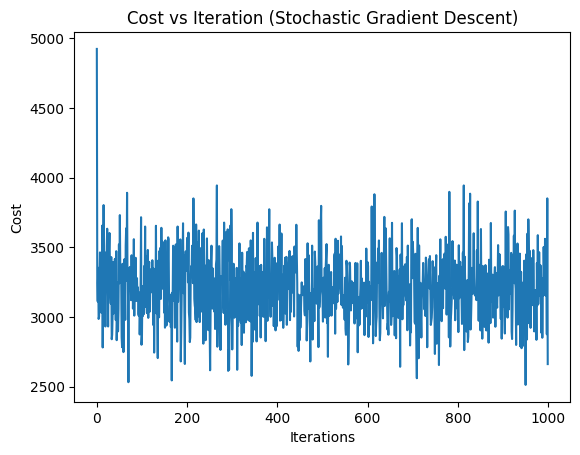

In [5]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iteration (Stochastic Gradient Descent)')
plt.show()
